In [133]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# train-test split
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import tensorflow as tf

# metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# scaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings('ignore')


<Axes: xlabel='Date'>

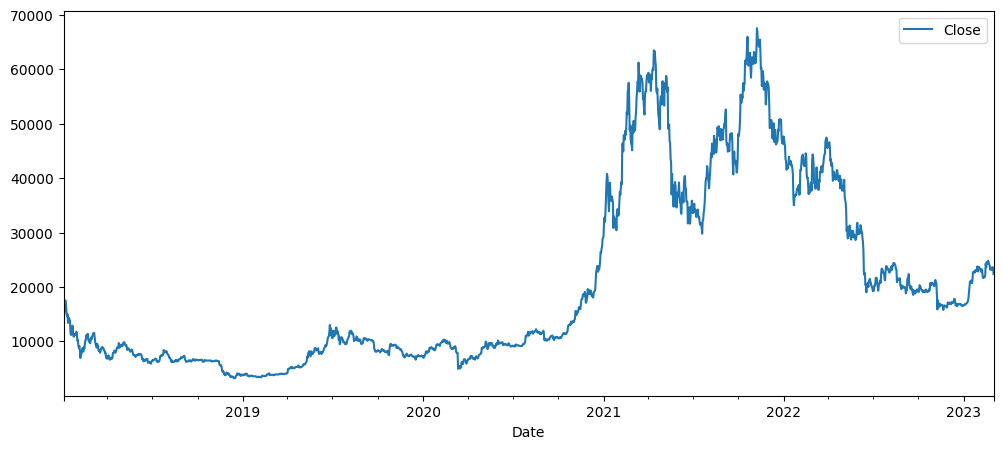

In [149]:
symbol = 'BTC-USD'
btc = yf.Ticker(symbol)
df = btc.history(period='max')[['Close']]
df = df[df.index > '2018-01-01']
#df = df[df.index > '2022-05-07']
df.plot()

In [164]:
for i in range(1, 168):
    df[f'Close-{i}'] = df['Close'].shift(i)
    df[f'Close-roll-mean-{i}'] = df['Close'].shift(i).rolling(24).mean()
    df[f'Close-roll-std-{i}'] = df['Close'].shift(i).rolling(24).std()
    df[f'Close-roll-min-{i}'] = df['Close'].shift(i).rolling(24).min()
    df[f'Close-roll-max-{i}'] = df['Close'].shift(i).rolling(24).max()
    df[f'Close-roll-skew-{i}'] = df['Close'].shift(i).rolling(24).skew()
    df[f'Close-roll-kurt-{i}'] = df['Close'].shift(i).rolling(24).kurt()
    df[f'Close-roll-var-{i}'] = df['Close'].shift(i).rolling(24).var()
    df[f'Close-roll-sem-{i}'] = df['Close'].shift(i).rolling(24).sem()
    df[f'Close-roll-ema-mean-{i}'] = df['Close'].shift(i).ewm(span=24).mean()
    df[f'Close-roll-ema-std-{i}'] = df['Close'].shift(i).ewm(span=24).std()
    df[f'Close-roll-ema-var-{i}'] = df['Close'].shift(i).ewm(span=24).var()

    df[f'Close-{i}-pct'] = df['Close'].pct_change(i)
    df[f'Close-{i}-pct2'] = df['Close'].pct_change(i+1)
    df[f'Close-{i}-pct3'] = df['Close'].pct_change(i+2)
    df[f'Close-{i}-pct4'] = df['Close'].pct_change(i+3)
    df[f'Close-{i}-pct5'] = df['Close'].pct_change(i+4)
    df[f'Close-{i}-pct6'] = df['Close'].pct_change(i+5)
    df[f'Close-{i}-pct7'] = df['Close'].pct_change(i+6)
    df[f'Close-{i}-pct8'] = df['Close'].pct_change(i+7)
    df[f'Close-{i}-pct9'] = df['Close'].pct_change(i+8)
    df[f'Close-{i}-pct10'] = df['Close'].pct_change(i+9)
    df[f'Close-{i}-pct11'] = df['Close'].pct_change(i+10)
    df[f'Close-{i}-pct12'] = df['Close'].pct_change(i+11)
    df[f'Close-{i}-pct13'] = df['Close'].pct_change(i+12)
    df[f'Close-{i}-pct14'] = df['Close'].pct_change(i+13)
    df[f'Close-{i}-pct15'] = df['Close'].pct_change(i+14)
    df[f'Close-{i}-pct16'] = df['Close'].pct_change(i+15)
    df[f'Close-{i}-pct17'] = df['Close'].pct_change(i+16)



df.dropna(inplace=True)

In [161]:
df.shape

(1317, 4844)

In [162]:
# corr = df.corr()['Close'].sort_values(ascending=False)
# corr.loc[[x for x in corr.index if 'roll' in x]]

[0]	validation_0-rmse:16771.56537
[1]	validation_0-rmse:11689.21254
[2]	validation_0-rmse:8632.66588
[3]	validation_0-rmse:6398.54830
[4]	validation_0-rmse:4495.43431
[5]	validation_0-rmse:3450.43153
[6]	validation_0-rmse:2674.42050
[7]	validation_0-rmse:2000.49776
[8]	validation_0-rmse:1599.51570
[9]	validation_0-rmse:1352.40349
[10]	validation_0-rmse:1242.24898
[11]	validation_0-rmse:1169.02888
[12]	validation_0-rmse:1117.63604
[13]	validation_0-rmse:1090.57864
[14]	validation_0-rmse:1083.39545
[15]	validation_0-rmse:1077.14024
[16]	validation_0-rmse:1074.23283
[17]	validation_0-rmse:1069.73689
[18]	validation_0-rmse:1067.89926
[19]	validation_0-rmse:1066.54589
[20]	validation_0-rmse:1065.25610
[21]	validation_0-rmse:1066.56101
[22]	validation_0-rmse:1066.74494
[23]	validation_0-rmse:1066.70043
[24]	validation_0-rmse:1066.66077
[25]	validation_0-rmse:1067.42412
[26]	validation_0-rmse:1065.81605
[27]	validation_0-rmse:1066.03869
[28]	validation_0-rmse:1066.20159
[29]	validation_0-rmse

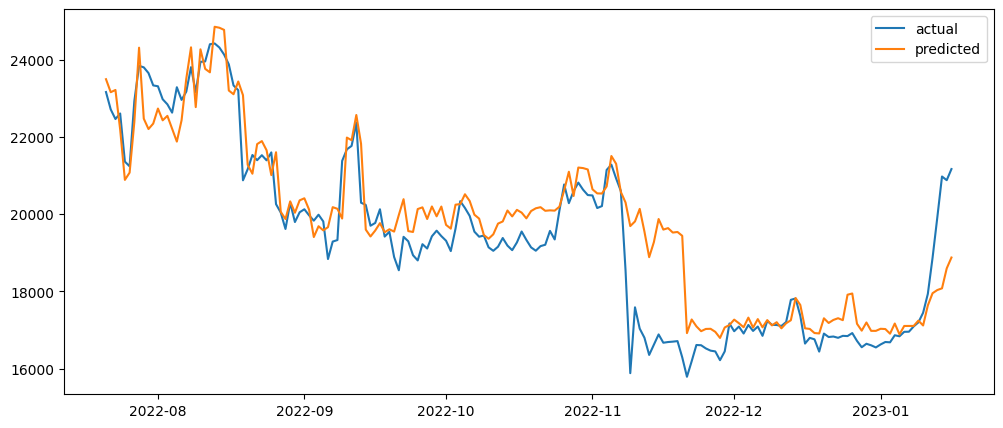

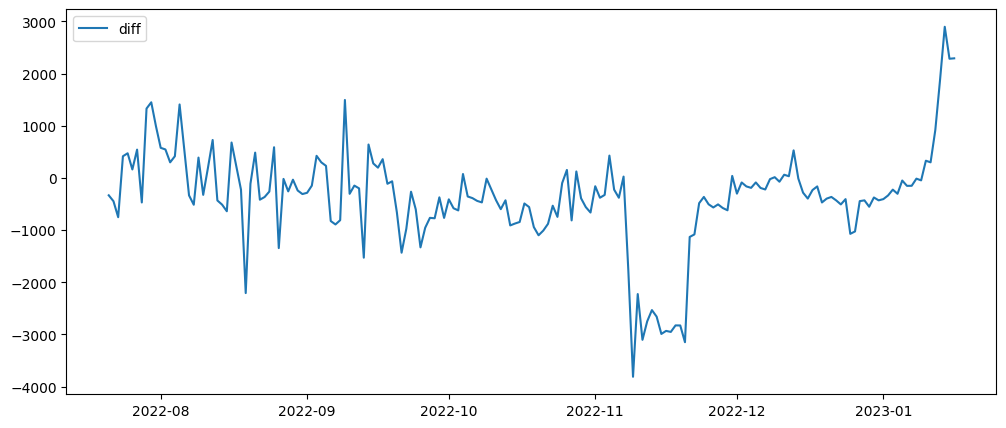

RMSE: 1021.3622963389209
MAE: 692.6082356770834
STD: 953.3190706525182


In [170]:
train, test = train_test_split(df, test_size=0.2, shuffle=False)

# Scale data
scaler = MinMaxScaler()
#scaler = StandardScaler()

X_train = train[train.columns[1:]]
X_train = scaler.fit_transform(X_train)
y_train = train['Close']

X_test = test[test.columns[1:]]
X_test = scaler.transform(X_test)
y_test = test['Close']

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.2, shuffle=False)

##### ML models #####
# model = LinearRegression(
#     fit_intercept=True,
# )

model = XGBRegressor(
     n_estimators=500,
#     learning_rate=0.05,
#     max_depth=5
)
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=50)

##### Neural Network #####
# model = tf.keras.Sequential([

#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(1)
# ])
# model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=0)

# # plot history
# plt.rcParams['figure.figsize'] = [12, 5]
# plt.plot(model.history.history['loss'], label='loss')
# plt.plot(model.history.history['val_loss'], label='val_loss')
# plt.legend()
# plt.show()

y_pred = model.predict(X_test)
final = pd.DataFrame({'actual': y_test})
final['predicted'] = y_pred
final['diff'] = final['actual'] - final['predicted']

# plot
plt.rcParams['figure.figsize'] = [12, 5]
plt.plot(final['actual'], label='actual')
plt.plot(final['predicted'], label='predicted')
plt.legend()
plt.show()

#change plot size
plt.rcParams['figure.figsize'] = [12, 5]
plt.plot(final['diff'], label='diff')
plt.legend()
plt.show()

# metrics
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('STD:', final['diff'].std())